# Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic data

In [4]:
# data url
data_path = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# load the df
df = pd.read_csv(data_path,usecols=['Age','Sex','Fare','Pclass','SibSp','Embarked','Survived'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [5]:
# check for missing values

df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


# EDA

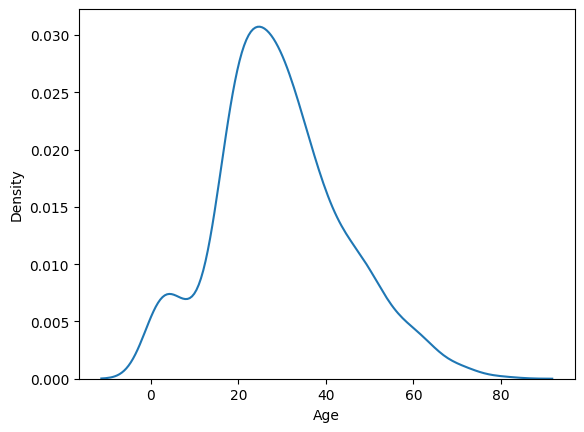

In [7]:
# distribution of age column

sns.kdeplot(data=df,x='Age');

In [8]:
# skewness of age column

df['Age'].skew()

0.38910778230082704

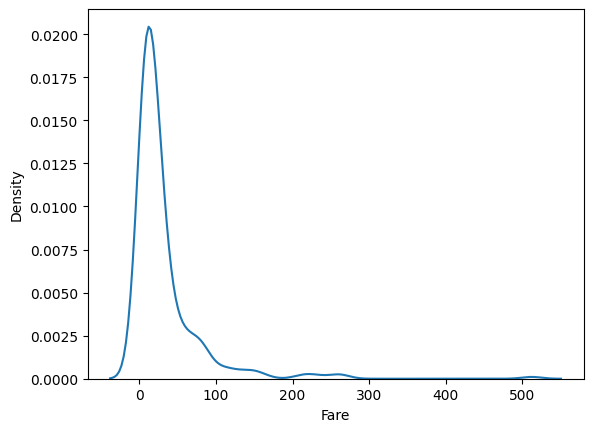

In [9]:
# distribution of fare column

sns.kdeplot(data=df,x='Fare');

In [10]:
# skewness of fare column

df['Fare'].skew()

4.787316519674893

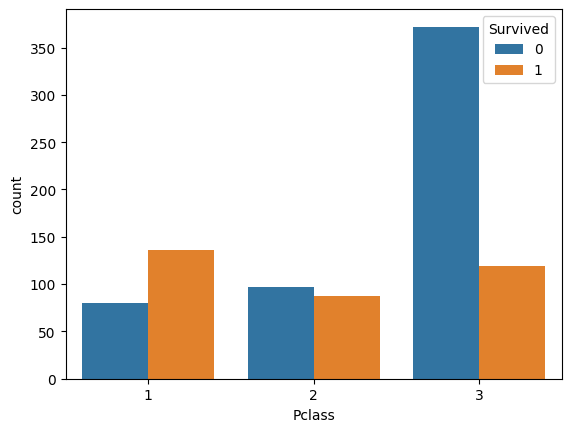

In [11]:
# distribution of Pclass

sns.countplot(data=df,x='Pclass',hue='Survived');

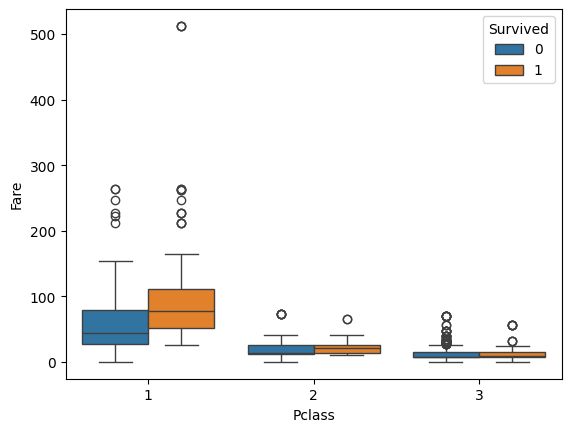

In [12]:
# boxplot of Pclass vs Fare

sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived');

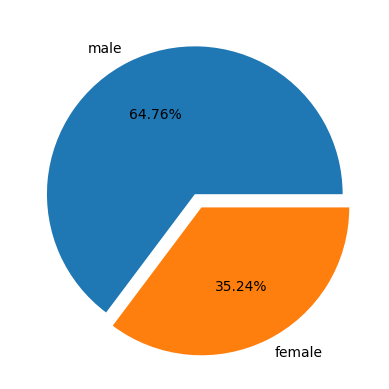

In [13]:
# gender distribution 

plt.pie(df['Sex'].value_counts(),labels=df['Sex'].value_counts().index,
       autopct="%.2f%%", explode=[0,0.1]);

## Target Distribution

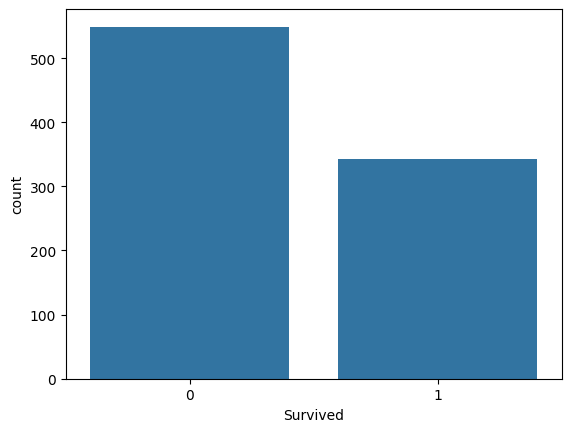

In [14]:
# target class distribution

sns.countplot(data=df,x='Survived');

# Data Preparation

In [15]:
# create X and y
X = df.drop('Survived',axis=1)

y = df['Survived']

## Train Test split

In [16]:
# do train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)

The shape of X_train is (712, 6)
The shape of X_test is (179, 6)


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

In [18]:
from IPython.display import display
from PIL import Image

In [19]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

# Feature Preprocessing

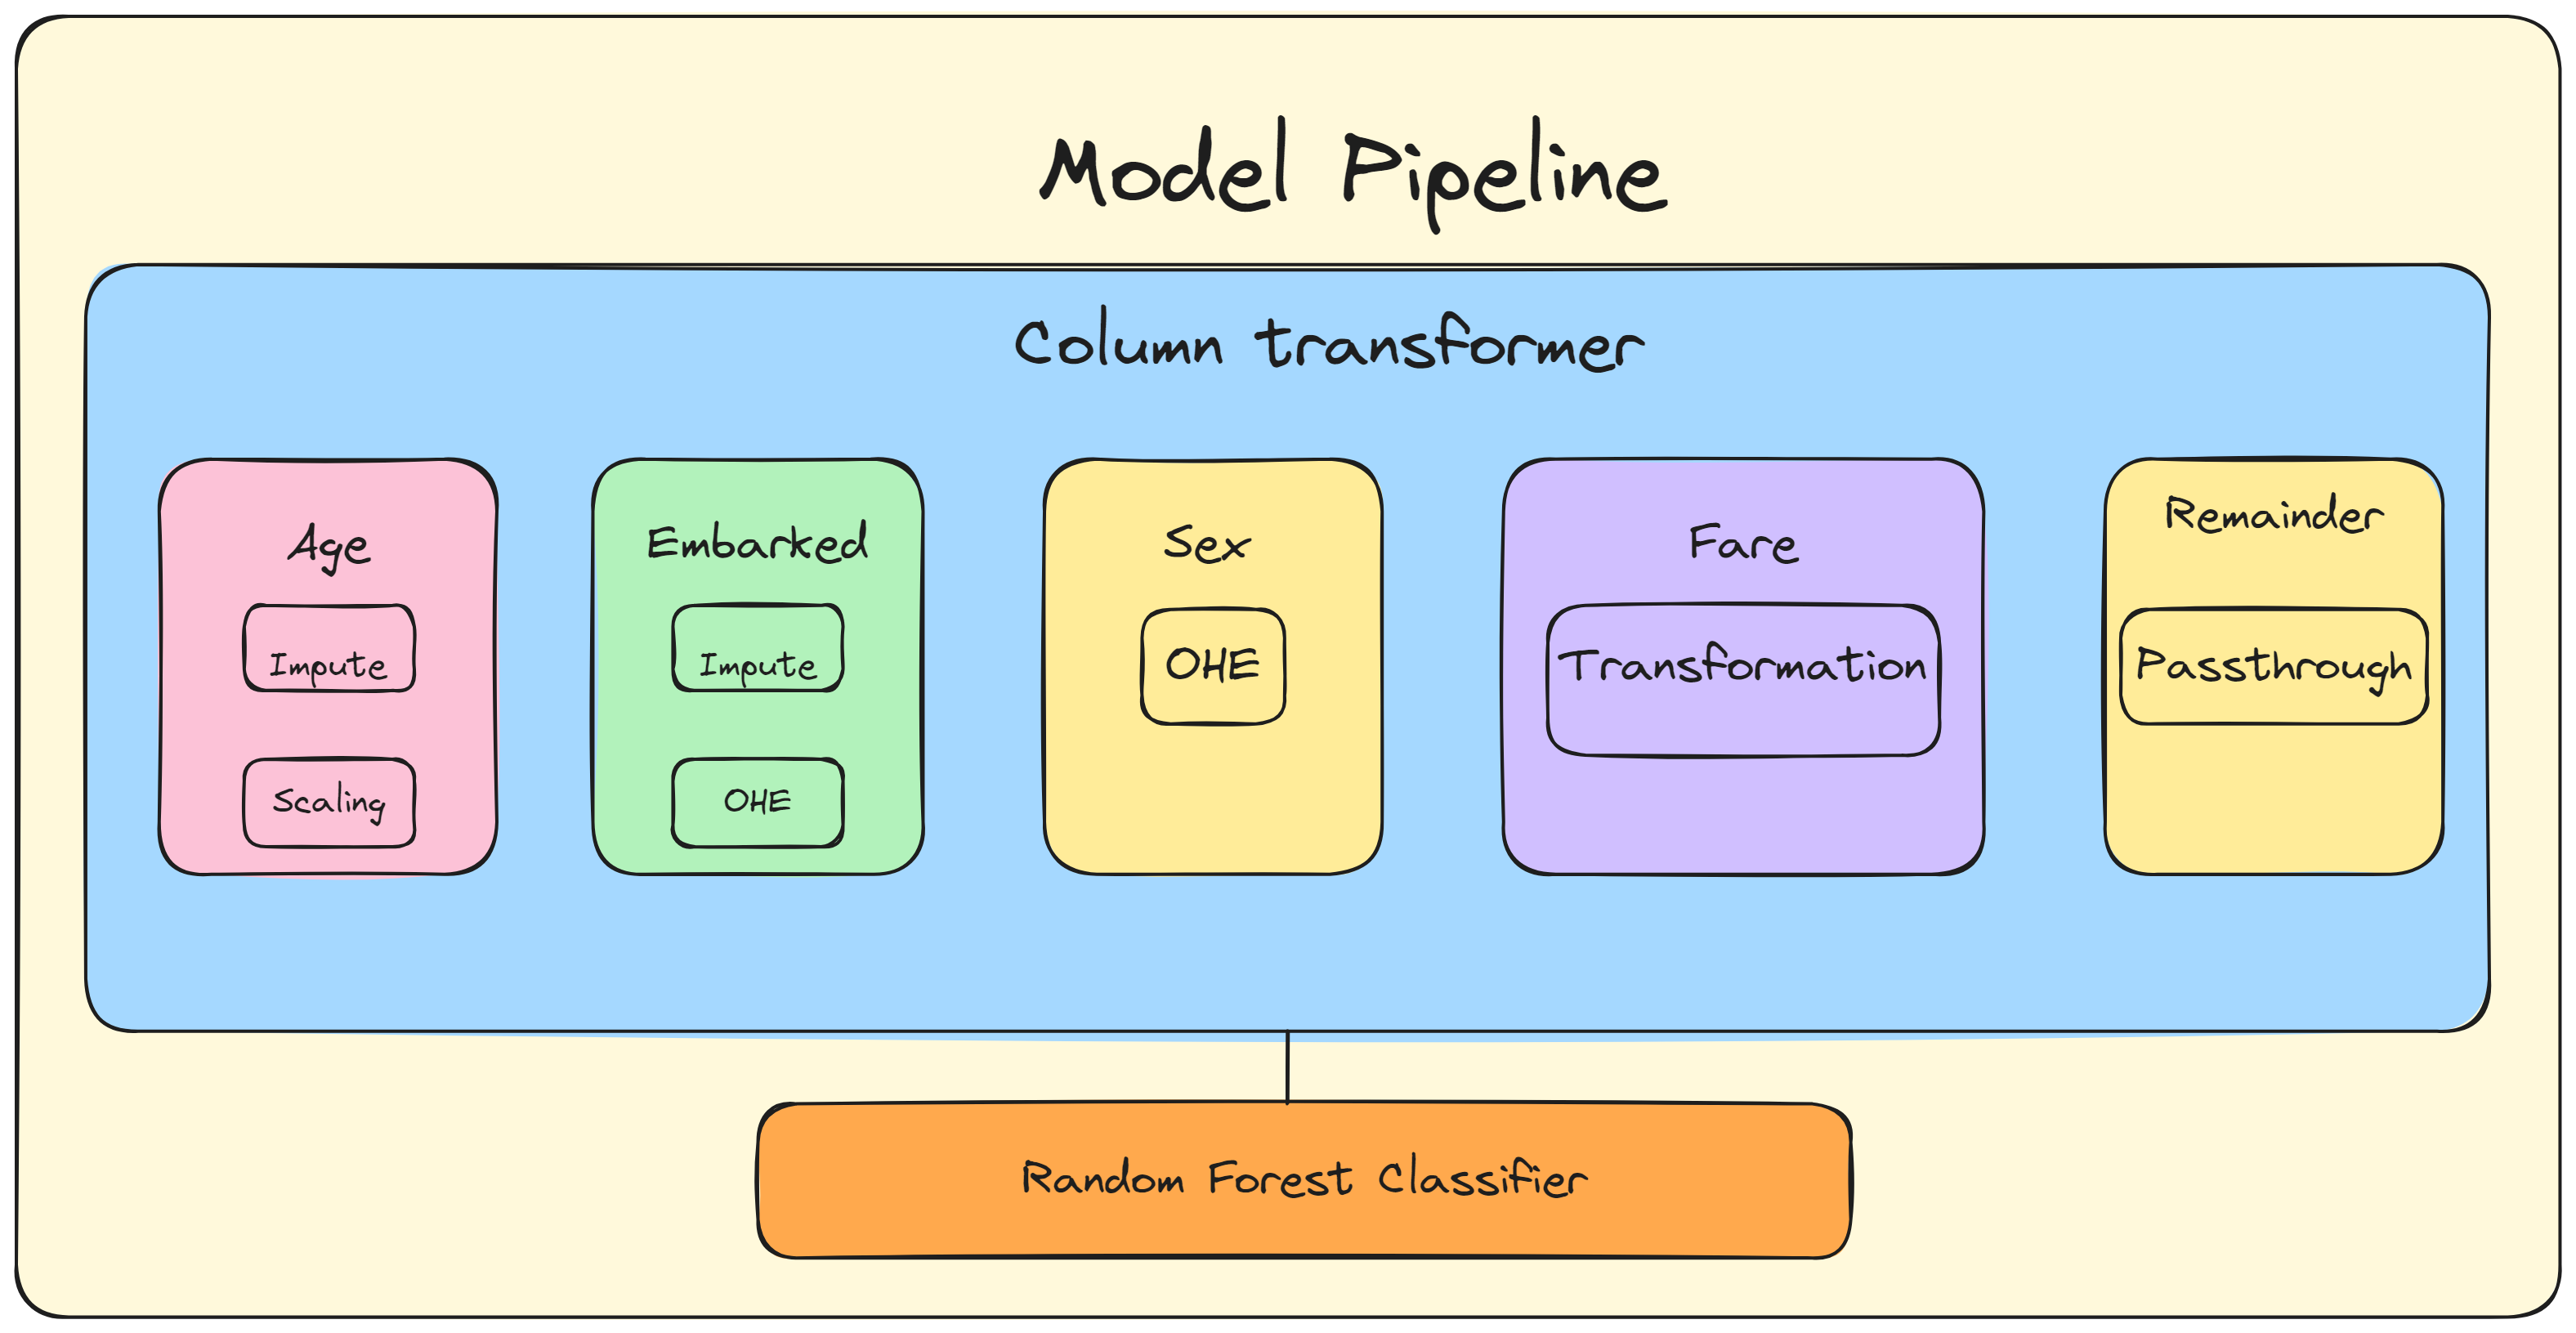

In [20]:
display(Image.open('Images/model pipeline.png'))

In [21]:
# create the Pipeline for age

age_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
])


# create pipeline for embarked
embarked_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy="most_frequent")),
    ('one_hot',OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False))
])


In [22]:
age_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [23]:
embarked_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('one_hot',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [24]:
# data preprocessing

preprocessor = ColumnTransformer(transformers=[
    ('age',age_pipe,['Age']),
    ('embarked',embarked_pipe,['Embarked']),
    ('fare',PowerTransformer(),['Fare']),
    ('sex',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['Sex']),
    
], remainder='passthrough')

preprocessor.set_output(transform='pandas')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['Age']),
                                ('embarked',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Embarked']),
                                ('fare', PowerTransformer(), ['Fare']),
                                ('sex',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex'])])

# Model Pipeline

In [25]:
# model pipeline

clf = RandomForestClassifier()

model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',clf)
])

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('fare', PowerTransformer(),
                                                  ['Fare']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex'])])),
                ('model', RandomForestClassifier())])

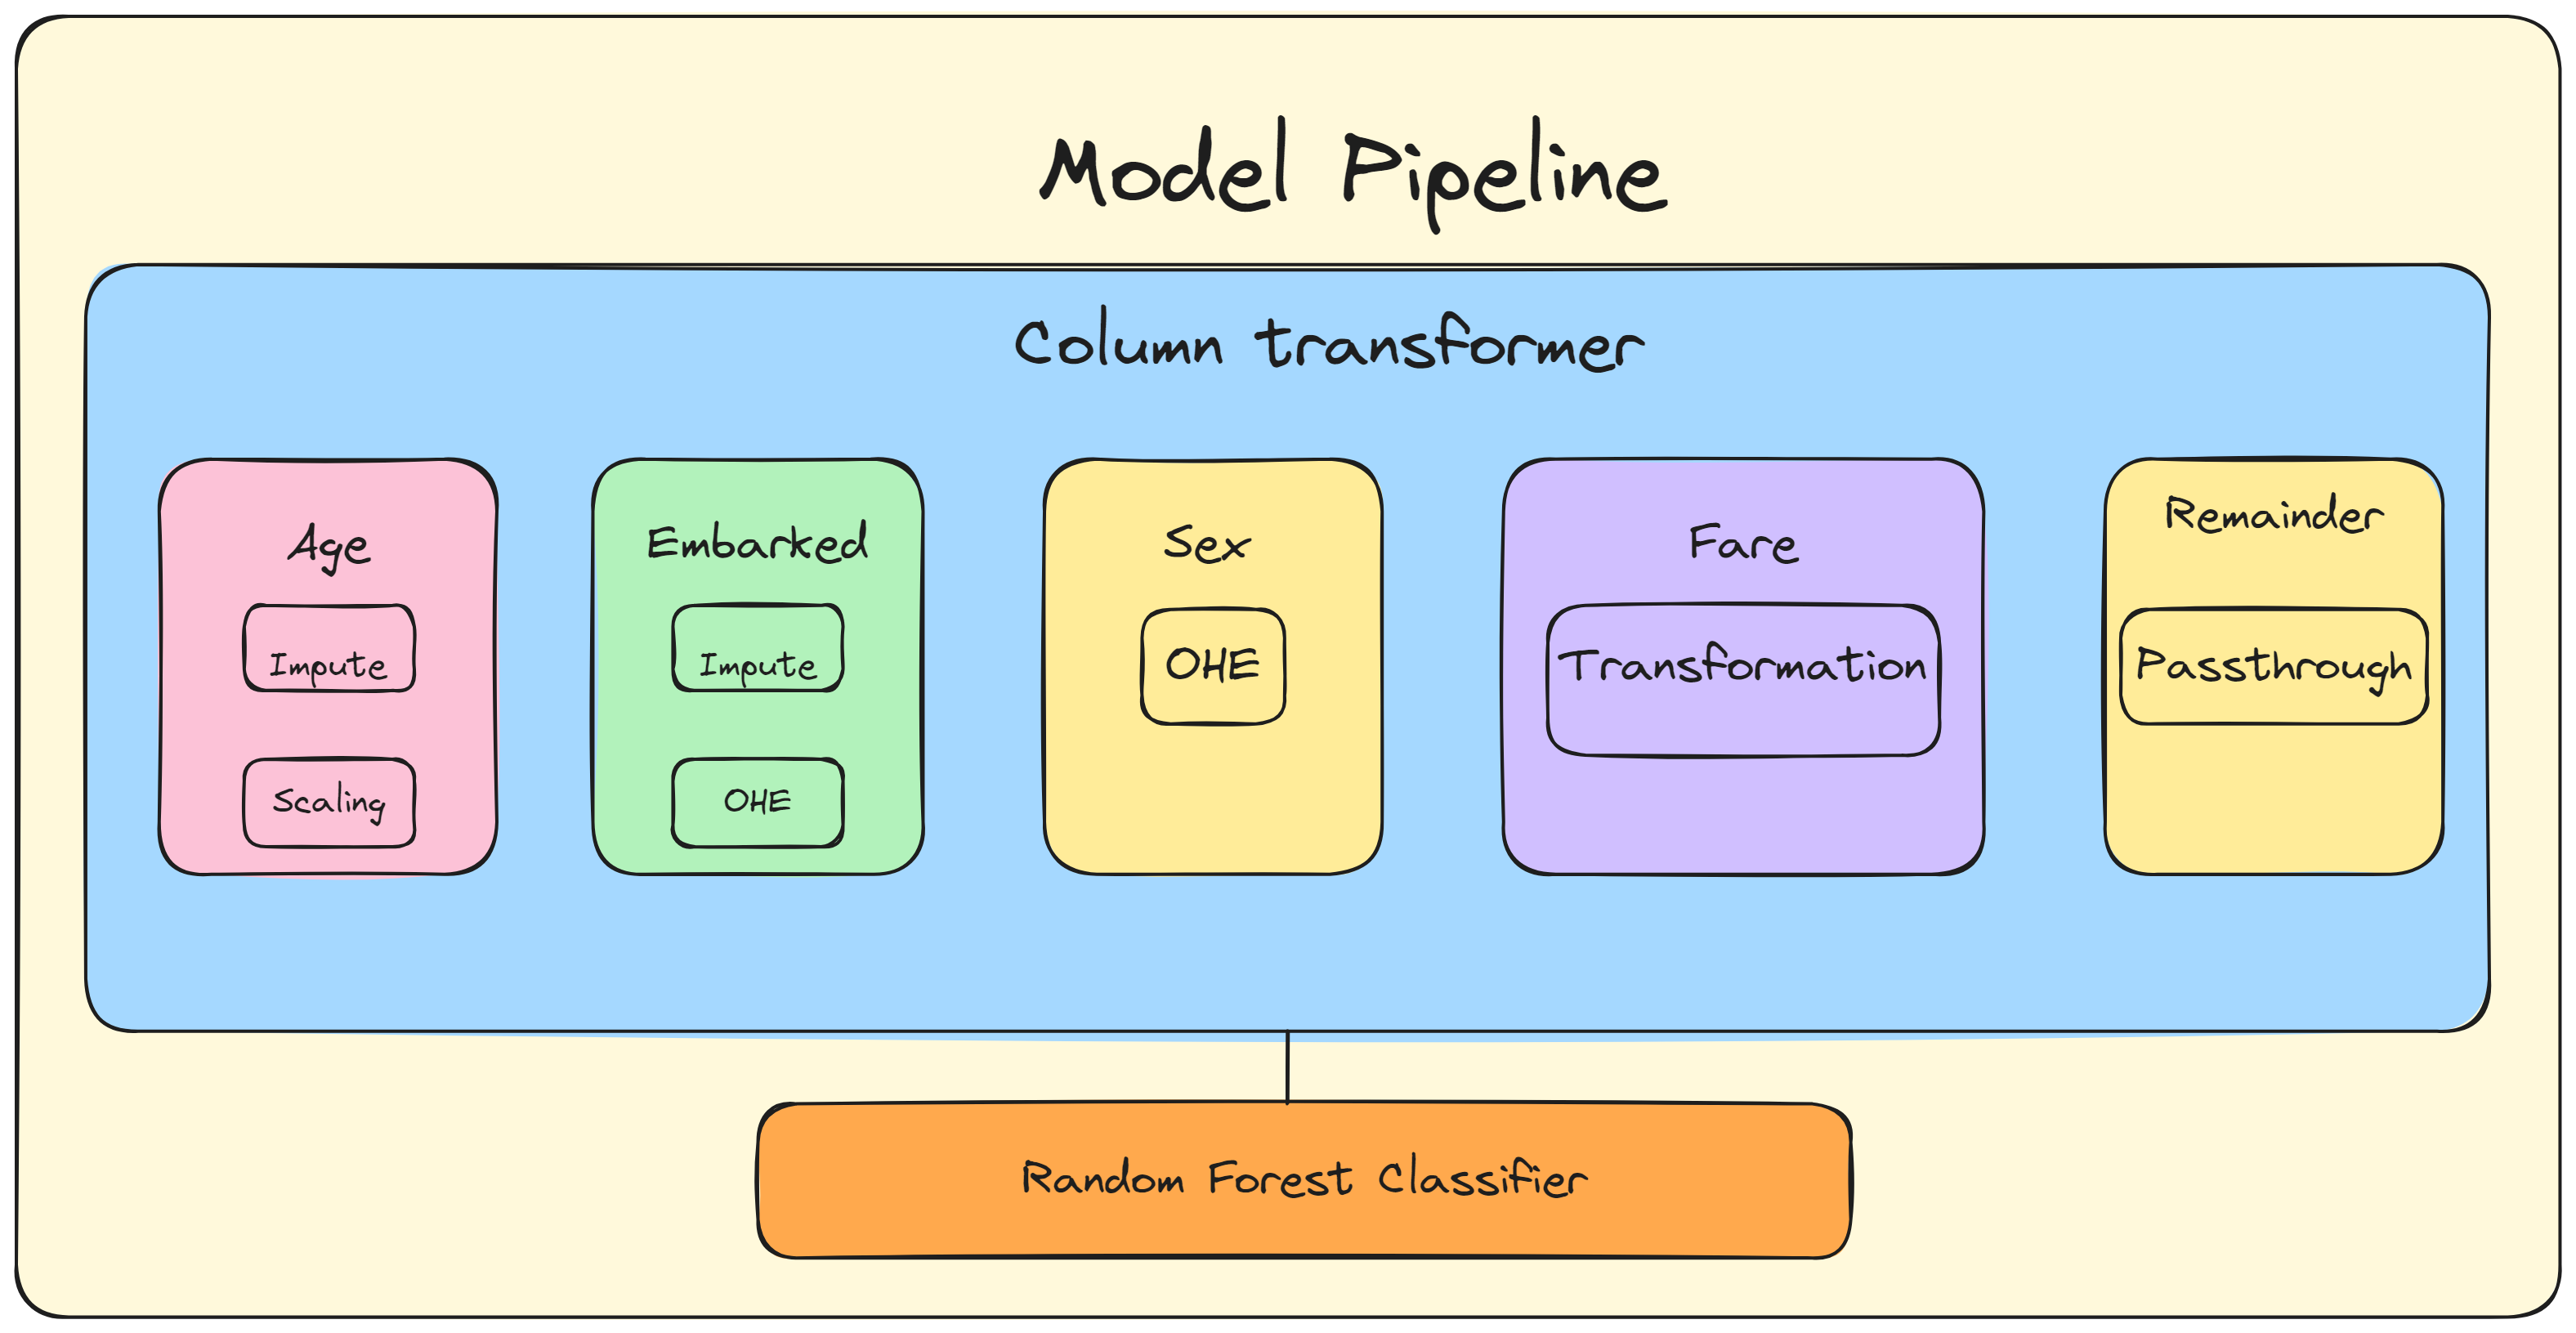

In [26]:
display(Image.open('Images/model pipeline.png'))

## Model training

In [27]:
# fit the model on training data

model_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('fare', PowerTransformer(),
                                                  ['Fare']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex'])])),
                ('model', RandomForestClassifier())])

## Predictions and Evaluation

In [28]:
# do predictions

y_pred_train = model_pipe.predict(X_train) 

y_pred_test = model_pipe.predict(X_test)

In [29]:
# calculate the accuracy
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train,y_pred_train) 

test_acc = accuracy_score(y_test,y_pred_test)

print('The train accuracy is ',train_acc)
print('The test accuracy is ',test_acc)

The train accuracy is  0.9789325842696629
The test accuracy is  0.8156424581005587


In [30]:
# do cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(estimator=model_pipe,X=X_train,y=y_train,
                        scoring='accuracy',cv=5,n_jobs=-1)

In [31]:
# mean validation score
print('The avg validation score is',np.mean(score))

The avg validation score is 0.7963853048360091


In [32]:
score

array([0.79020979, 0.77622378, 0.79577465, 0.8028169 , 0.81690141])

# HP tuning of model

In [33]:
# define the params grid

params = {
    'preprocessor__age__impute__strategy':['mean','median'],
    'model__n_estimators':list(range(100,550,50))
}

In [34]:
list(range(100,550,50))

[100, 150, 200, 250, 300, 350, 400, 450, 500]

In [35]:
# do hyperparameter tuning using grid_search

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_pipe, param_grid=params, scoring='accuracy', 
                           n_jobs=-1, cv=5, return_train_score=True,verbose=2)

In [36]:
# fit on training data

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age']),
                                                                        ('embarked',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        spars...
                                                                         ['Embarked']),
                                                                        ('fare',
                                                                         PowerTransformer(),
                                                                         ['Fare']),
                                                                        ('sex',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Sex'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_estimators': [100, 150, 200, 250, 300, 350,
                                                 400, 450, 500],
                         'preprocessor__age__impute__strategy': ['mean',
                                                                 'median']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [37]:
# best estimator

best_model = grid_search.best_estimator_

# best_params
grid_search.best_params_

{'model__n_estimators': 250, 'preprocessor__age__impute__strategy': 'mean'}

In [38]:
# best score
grid_search.best_score_

0.8146360681571949

In [39]:
# best index value
grid_search.best_index_

6

In [40]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_preprocessor__age__impute__strategy,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.546349,0.093471,0.058820,0.019164,100,mean,"{'model__n_estimators': 100, 'preprocessor__ag...",0.804196,0.783217,0.809859,...,0.809032,0.017504,3,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
1,0.475387,0.021264,0.044229,0.006978,100,median,"{'model__n_estimators': 100, 'preprocessor__ag...",0.797203,0.776224,0.809859,...,0.797784,0.014549,18,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
2,0.746747,0.031411,0.058659,0.010835,150,mean,"{'model__n_estimators': 150, 'preprocessor__ag...",0.818182,0.776224,0.802817,...,0.804797,0.015308,14,0.97891,0.984183,0.982456,0.980702,0.982456,0.981741,0.001793
3,0.776580,0.035373,0.052371,0.007870,150,median,"{'model__n_estimators': 150, 'preprocessor__ag...",0.811189,0.769231,0.795775,...,0.804816,0.022437,13,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
4,0.865360,0.020966,0.065332,0.006408,200,mean,"{'model__n_estimators': 200, 'preprocessor__ag...",0.811189,0.783217,0.802817,...,0.806205,0.018365,9,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
5,0.867682,0.008300,0.058517,0.006011,200,median,"{'model__n_estimators': 200, 'preprocessor__ag...",0.818182,0.776224,0.795775,...,0.807614,0.020819,6,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
6,1.189371,0.245003,0.086739,0.020651,250,mean,"{'model__n_estimators': 250, 'preprocessor__ag...",0.818182,0.790210,0.809859,...,0.814636,0.020863,1,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
7,1.200800,0.086287,0.073075,0.011085,250,median,"{'model__n_estimators': 250, 'preprocessor__ag...",0.797203,0.769231,0.802817,...,0.804836,0.022704,12,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
8,1.831126,0.390497,0.086727,0.023827,300,mean,"{'model__n_estimators': 300, 'preprocessor__ag...",0.811189,0.790210,0.802817,...,0.809012,0.015981,4,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
9,1.451284,0.169662,0.072960,0.015400,300,median,"{'model__n_estimators': 300, 'preprocessor__ag...",0.818182,0.783217,0.802817,...,0.806195,0.014209,10,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041


In [41]:
results.loc[grid_search.best_index_,:]

mean_fit_time                                                                         1.189371
std_fit_time                                                                          0.245003
mean_score_time                                                                       0.086739
std_score_time                                                                        0.020651
param_model__n_estimators                                                                  250
param_preprocessor__age__impute__strategy                                                 mean
params                                       {'model__n_estimators': 250, 'preprocessor__ag...
split0_test_score                                                                     0.818182
split1_test_score                                                                      0.79021
split2_test_score                                                                     0.809859
split3_test_score                                 